In [2]:
import torch

In [3]:
import scipy.io as sio
from scipy.interpolate import interp1d
from scipy import interpolate
import scipy
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

import matplotlib.cm as cm

import matplotlib.ticker as ticker

import seaborn as sns
import matplotlib.colors
from matplotlib.pyplot import show 

# Retrieve pickle and csv data

In [4]:
## pickle ##
import pickle

file = open('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/robin_data_tensor_dump.pkl', 'rb')
filtered_data_to_tensor = pickle.load(file)
amplitude_filtereddata_to_tensor  = pickle.load(file)
peak2peak_data_to_tensor = pickle.load(file)

file.close()



In [5]:
# to retrieve ##
mt_electrodes = pd.read_csv('/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_electrodes.csv')
mt_muscles= pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/mt_muscles.csv")
unique_amplitudes=pd.read_csv("/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/pickle_files/unique_amplitudes.csv")

# Recruitment curve

## Recruitment with peak to peak values

### Recruitment per elec without interpol1

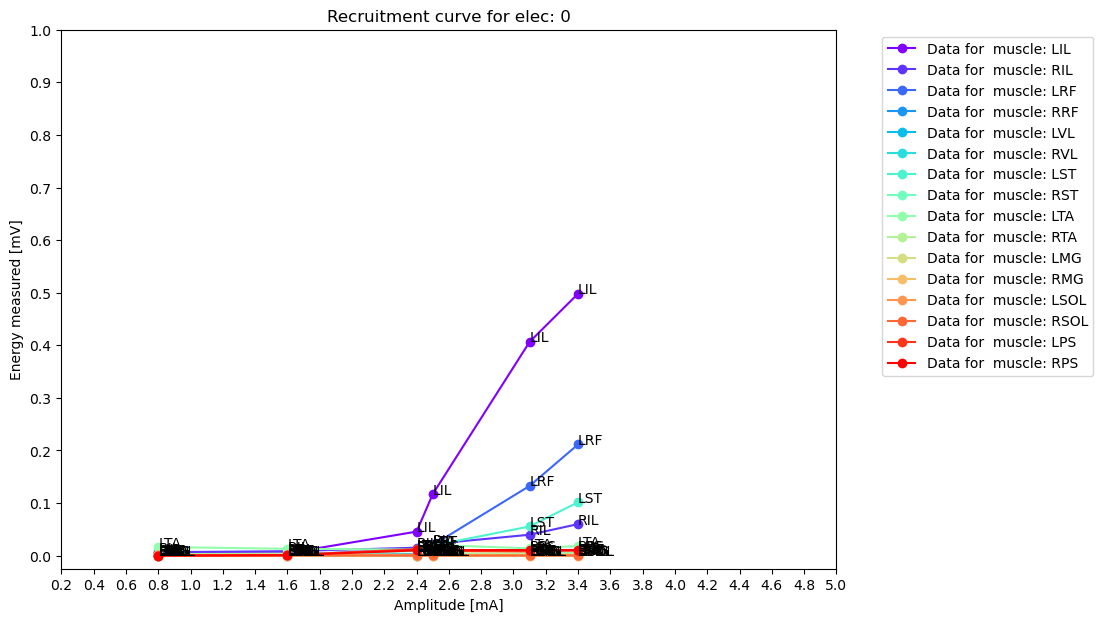

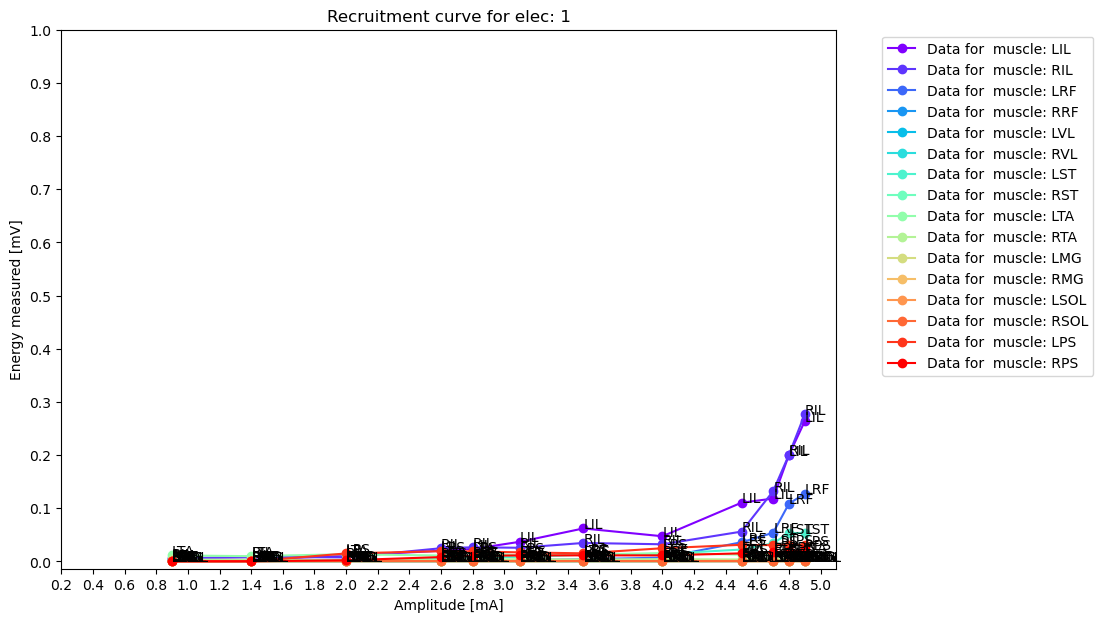

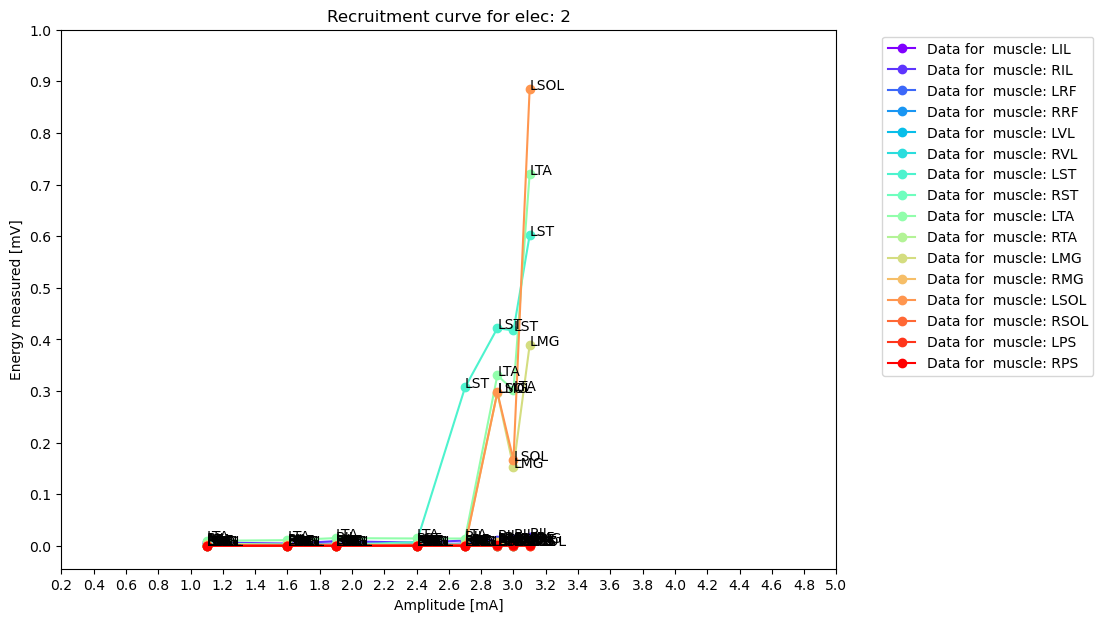

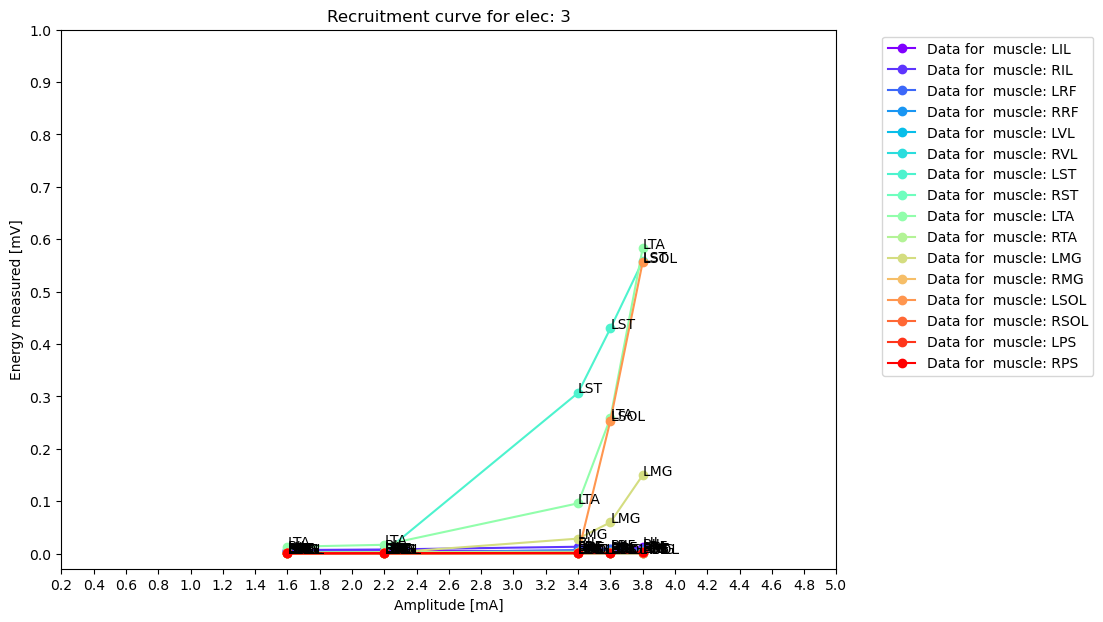

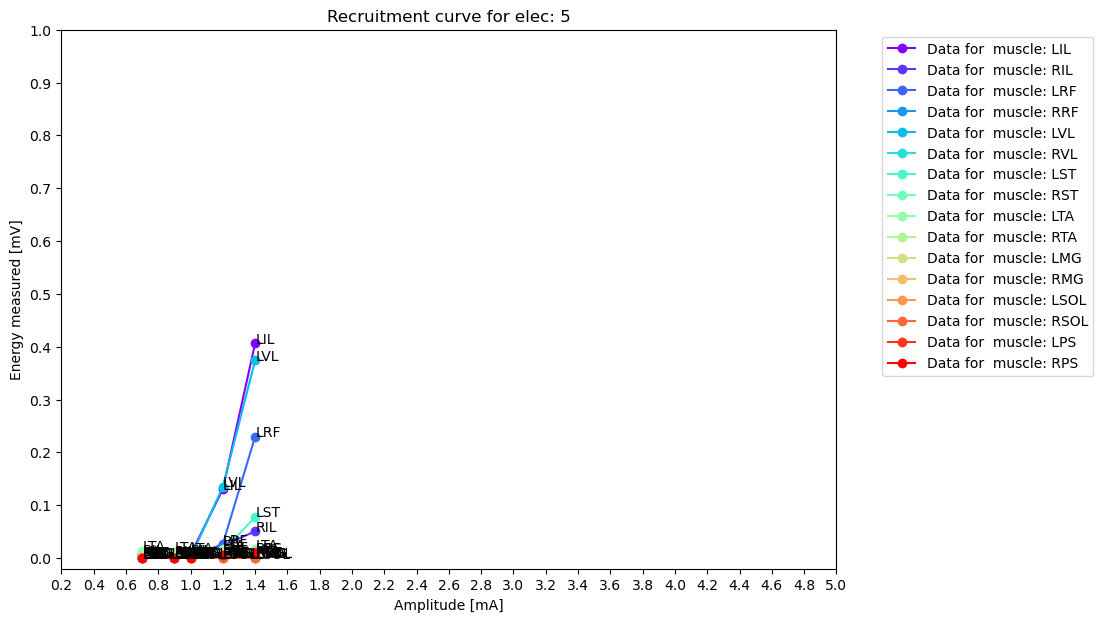

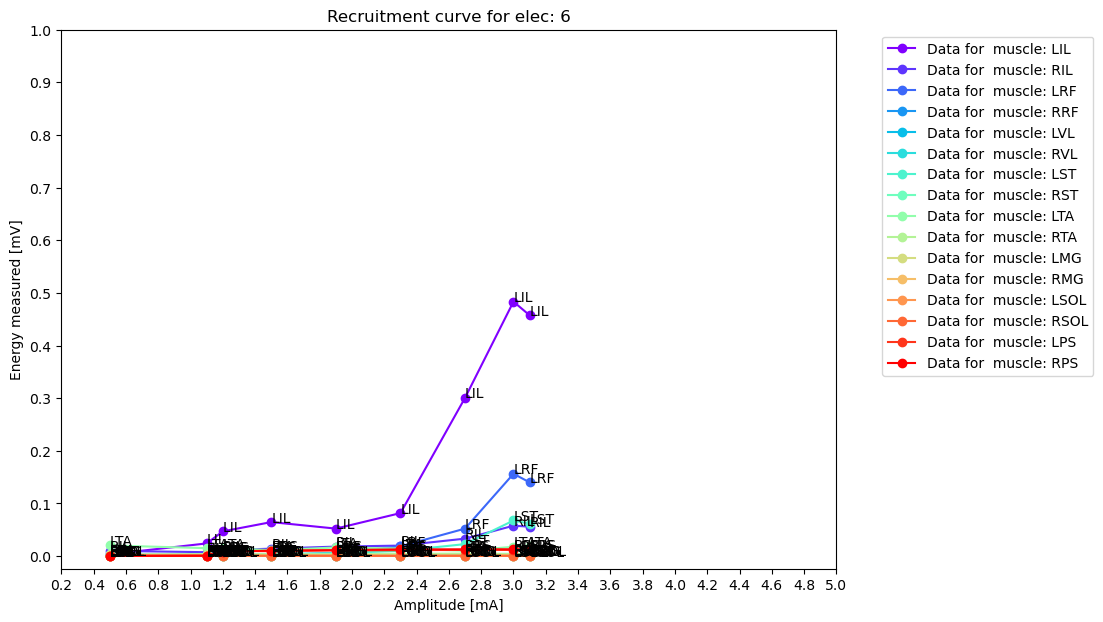

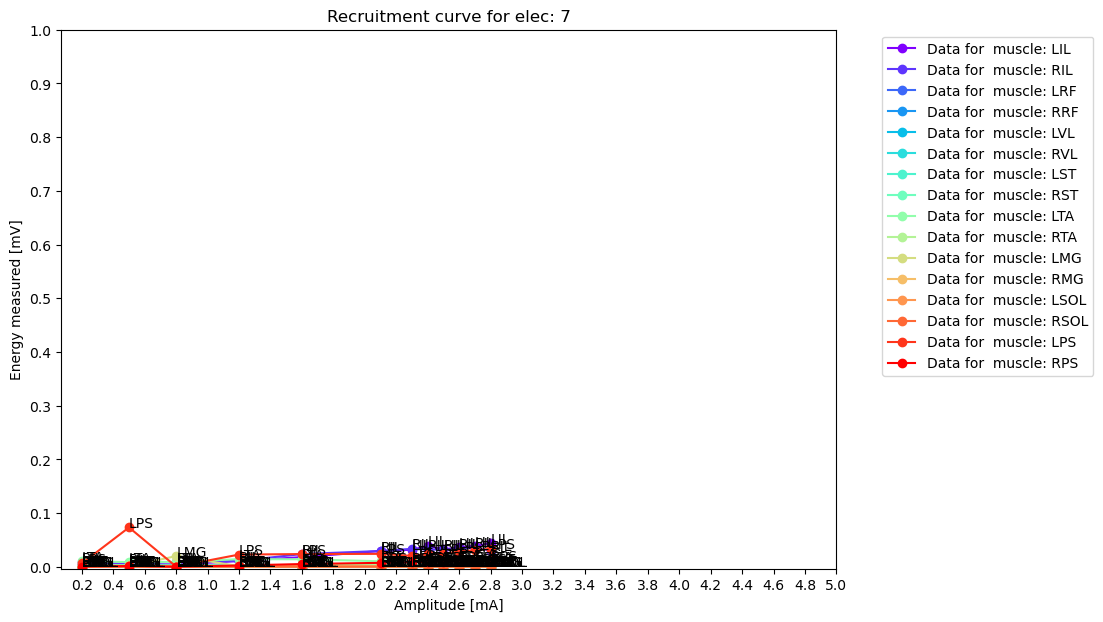

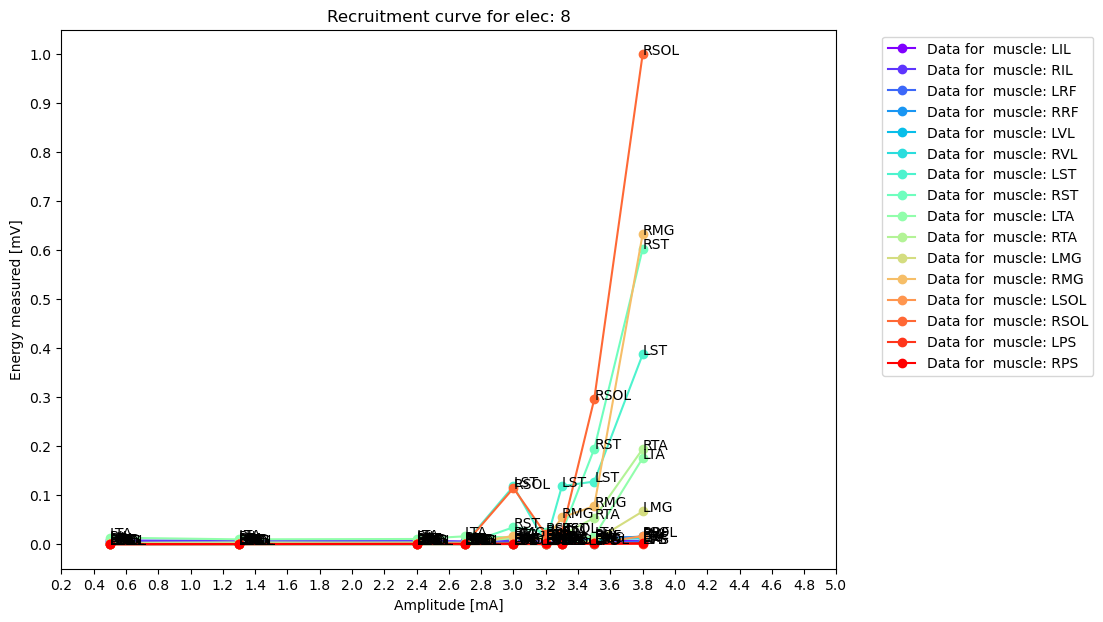

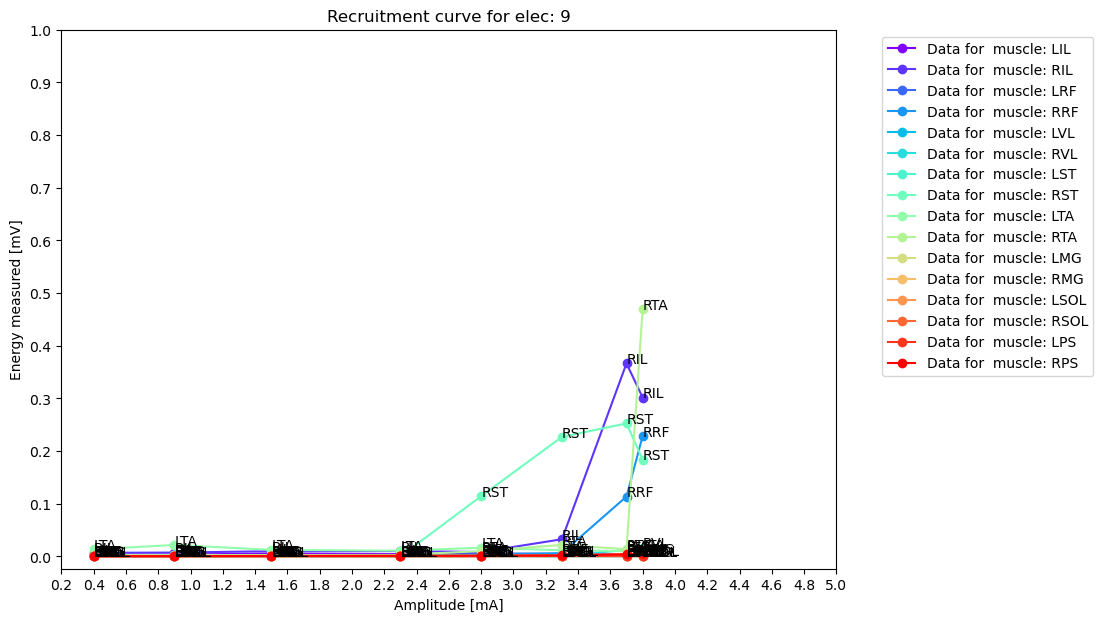

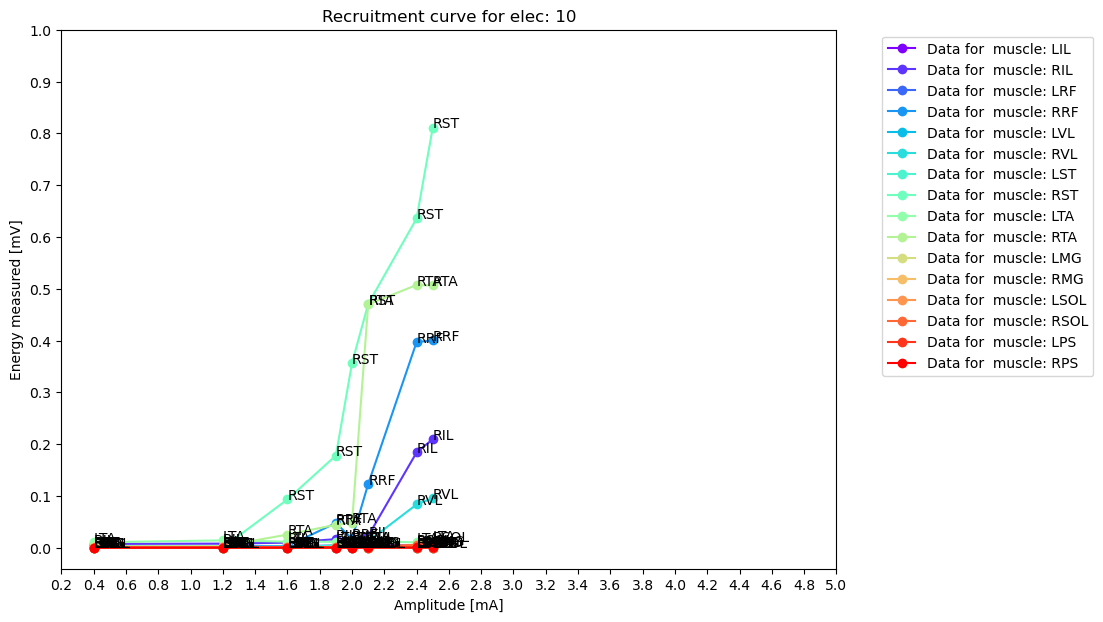

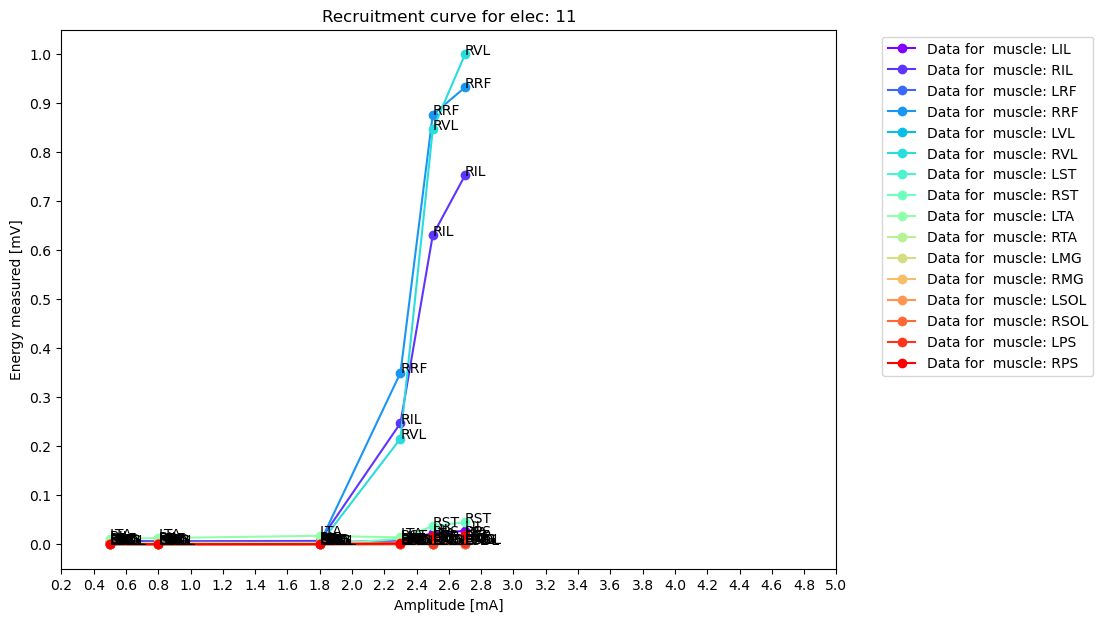

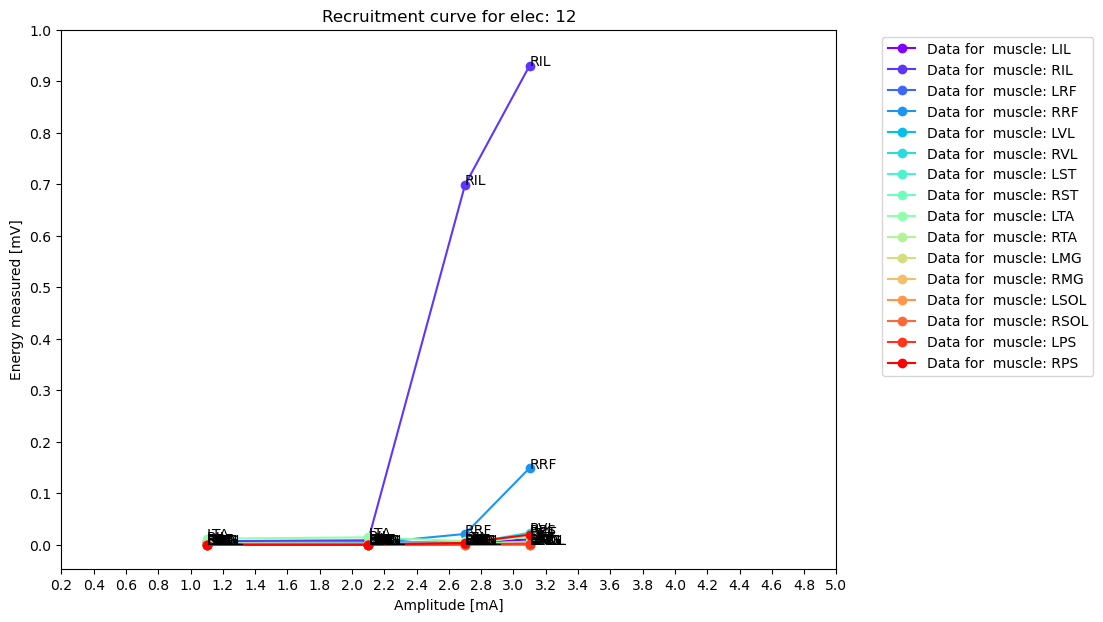

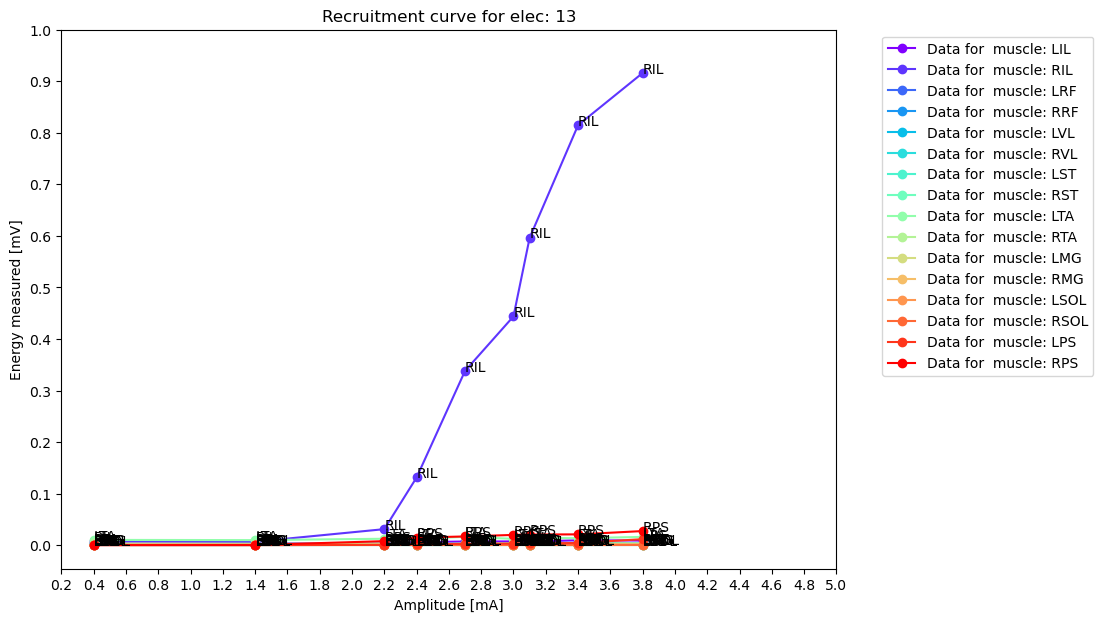

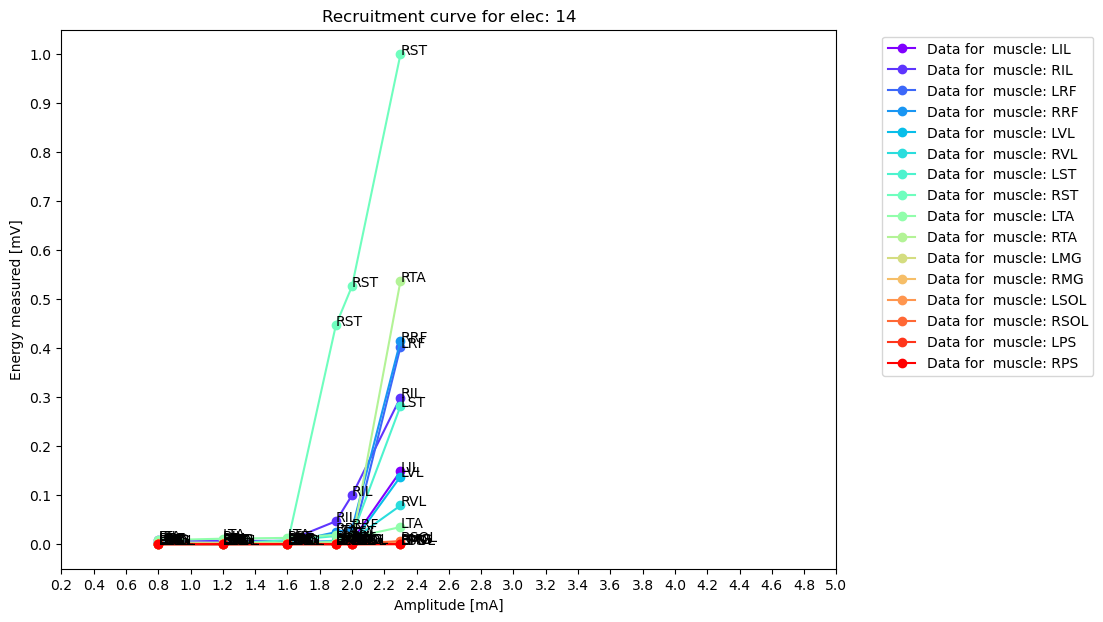

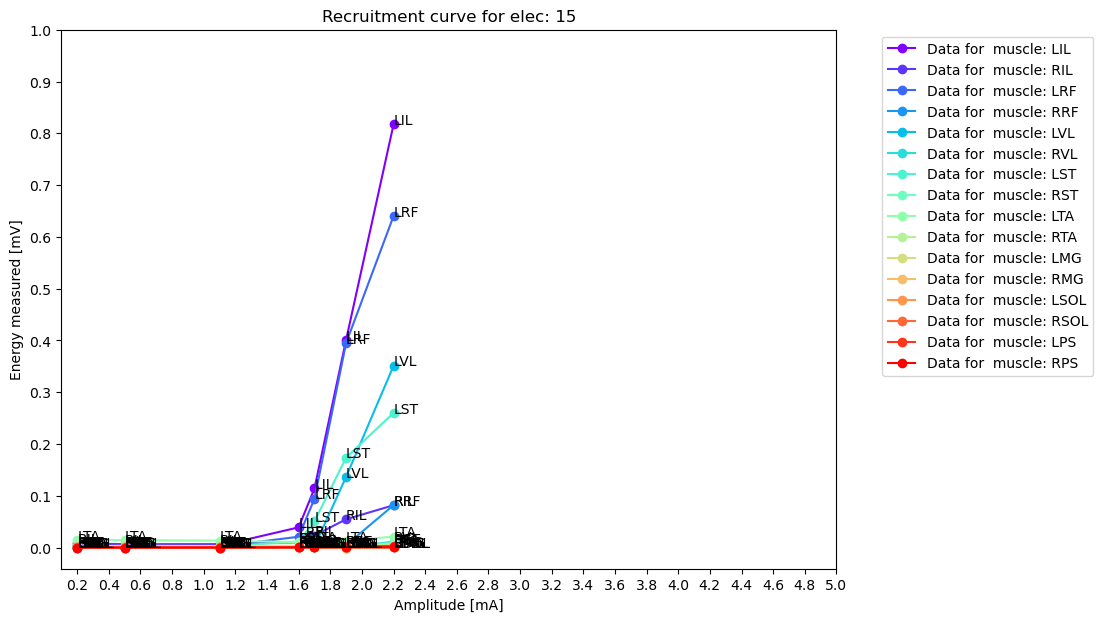

In [112]:
# Original, got rid of interpl1, since not as accurate as the default interpolation
#Safe the plot? set to 1
save_flag=0

colors = cm.rainbow(np.linspace(0, 1, len(mt_muscles)))
label=mt_muscles["muscle_name"]

for elec_i in range (0, len(mt_electrodes)):
  fig, ax = plt.subplots(figsize=(10,7))
  for muscle_i in range (len(mt_muscles)):

    # Define variables for plotting
    x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
    y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
 
    
    # Remove nan values
    x_without_nan=np.array(x)
    x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
    y_without_nan=np.array(y)
    y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

    # Plot the data points
    plt.plot(x_without_nan,  y_without_nan, 'o-', c=colors[muscle_i], label= f"Data for  muscle: {mt_muscles['muscle_name'][muscle_i]}") 
    
    # Add text descripiton to the points for visibility
    for index in range (len(x_without_nan)):
        ax.text(x_without_nan[index], y_without_nan[index], label[muscle_i], size=10) 
    
    
    # Set label and scale
    ax.set_xlabel("Amplitude [mA]")
    ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

 # Plotting settings
  ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.set_title(f"Recruitment curve for elec: {elec_i}")

  ## save plots ##
  data_folder = "/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/Recruitment_curve"
  save_folder = os.path.join(data_folder,"recruitment_per_elec")
  os.makedirs(save_folder,exist_ok=True)
  if save_flag:
      data_file = "elec"+"_"+str(elec_i)+"_"+"recruitment_curve"+'.png'
      data_file_path = os.path.join(save_folder,data_file)
      plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
  plt.show()


### Recruitment per muscle 

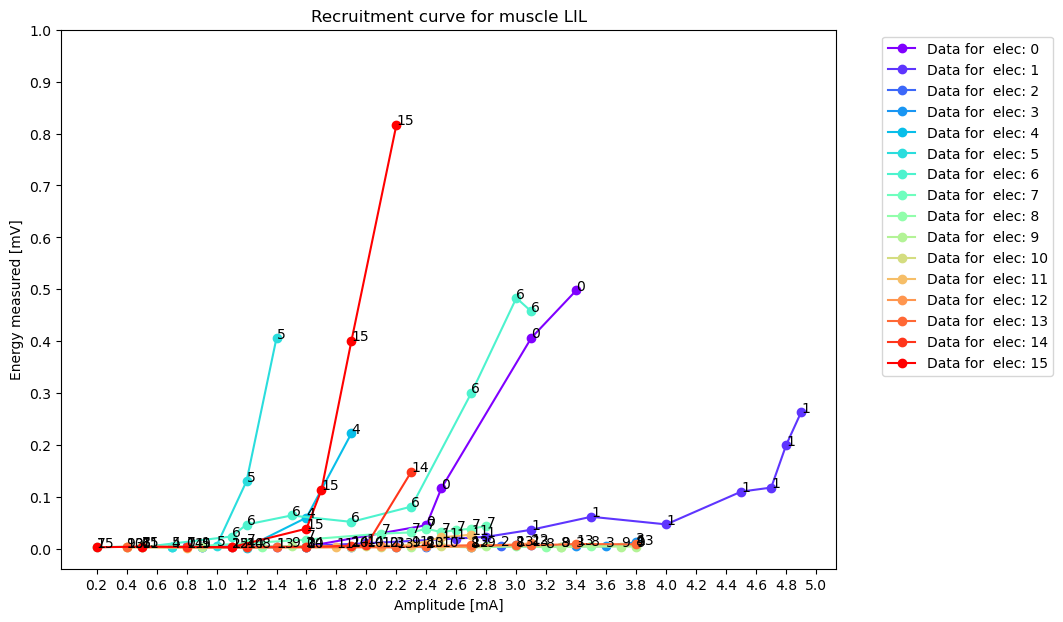

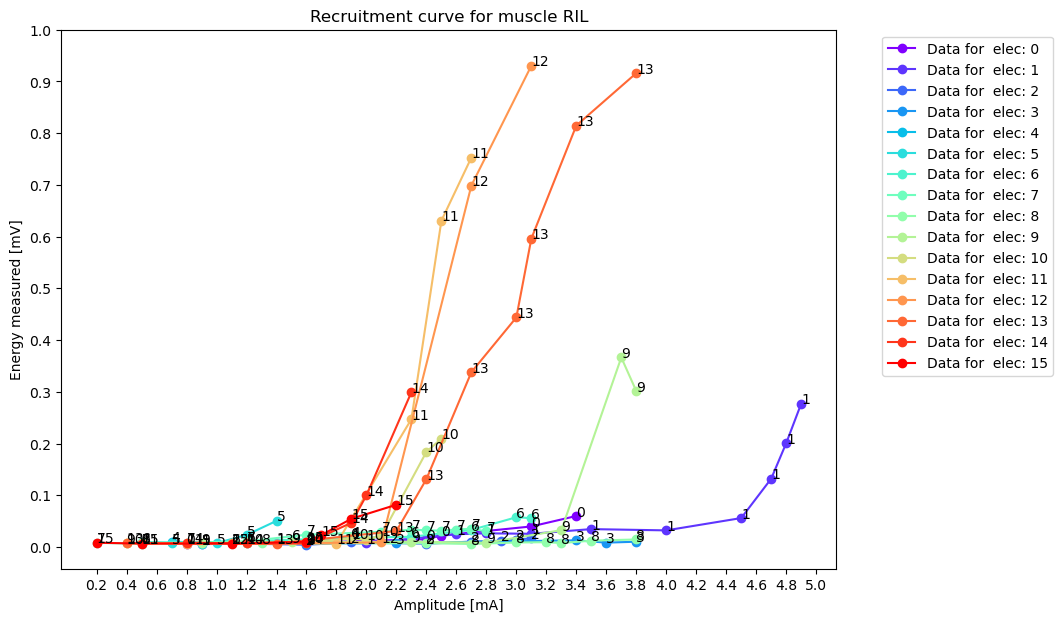

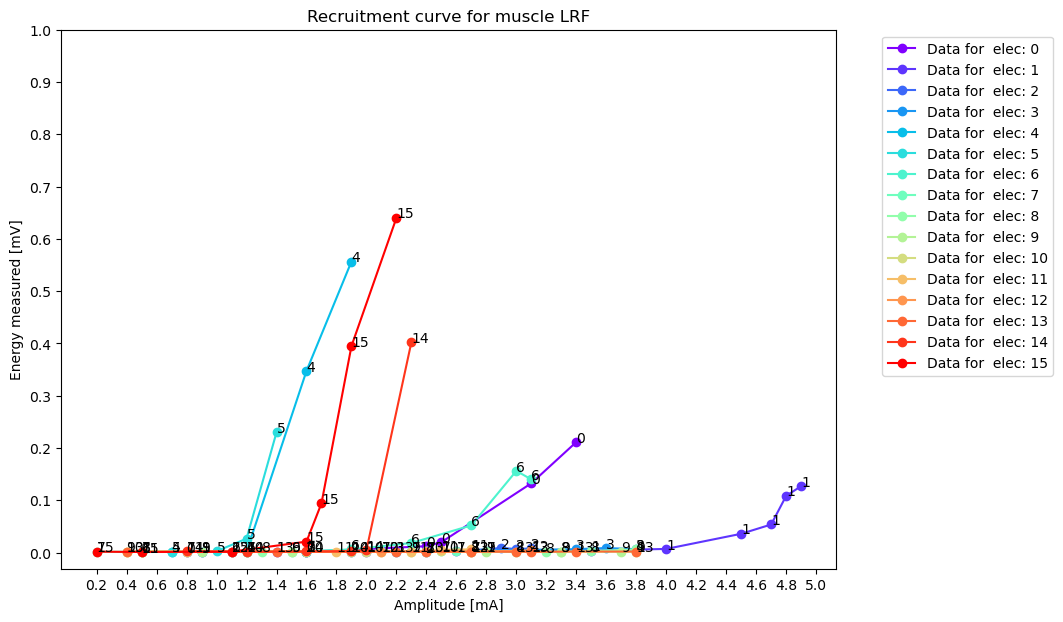

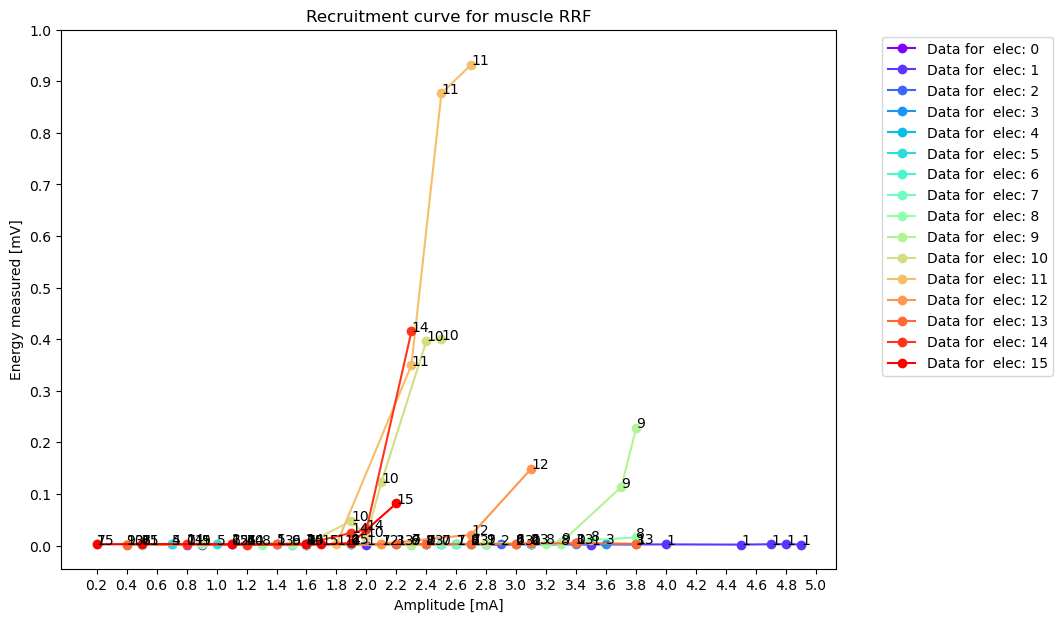

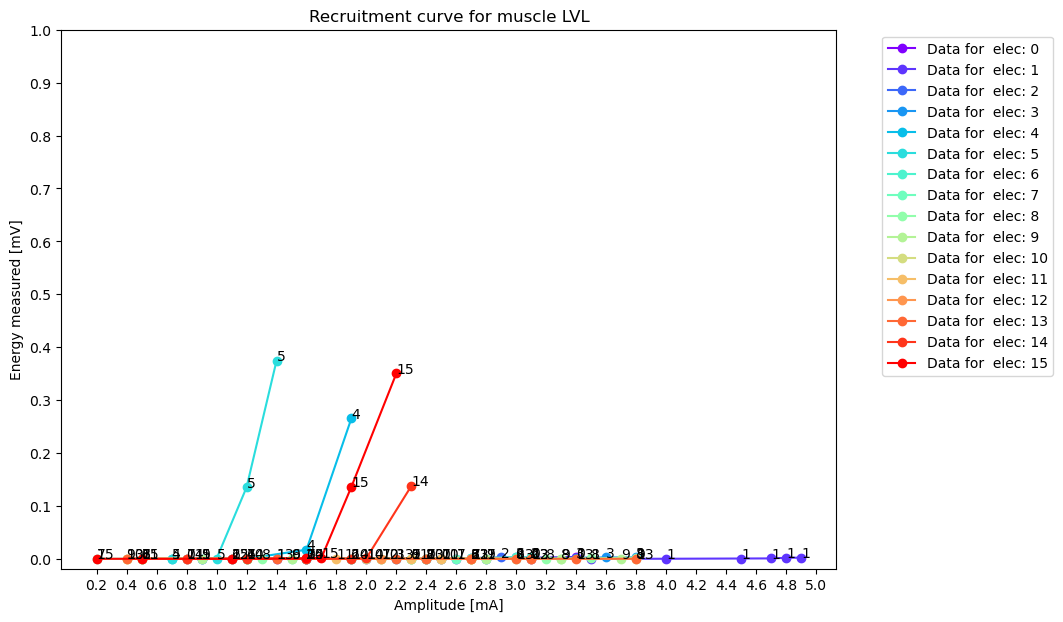

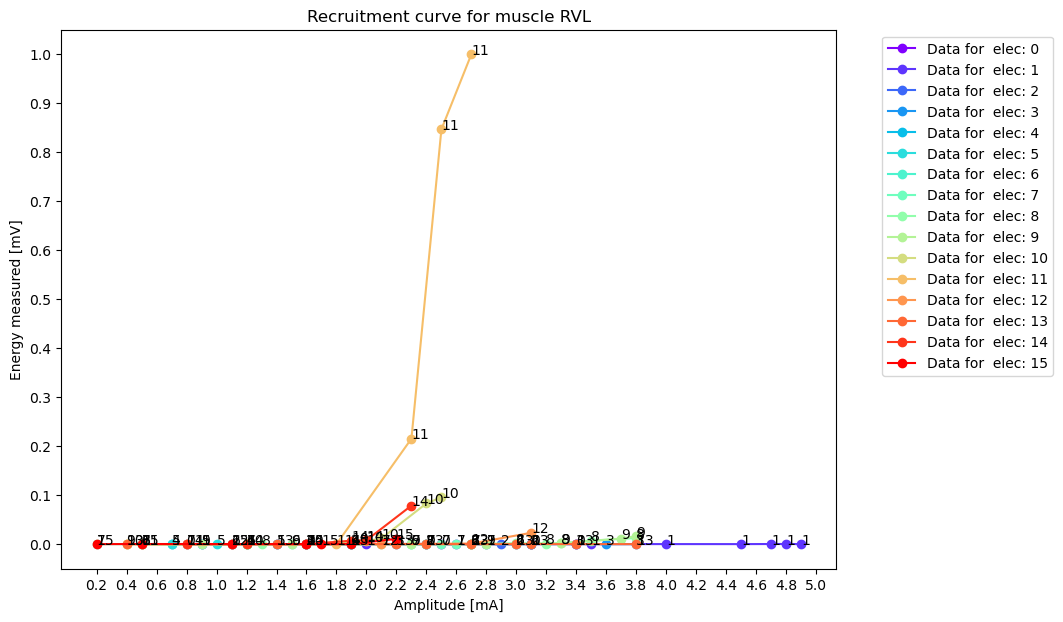

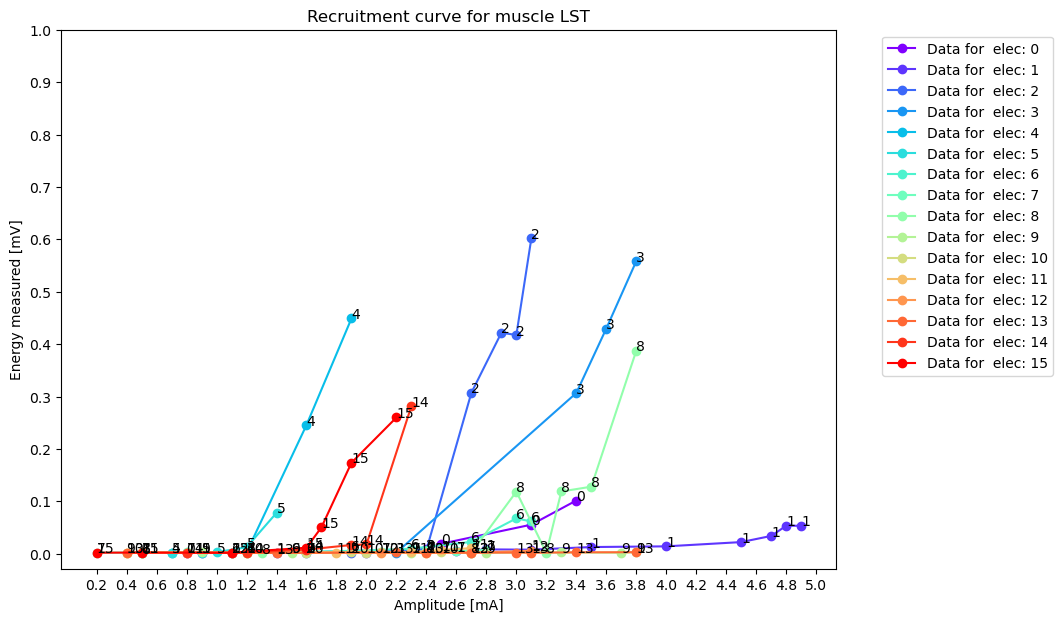

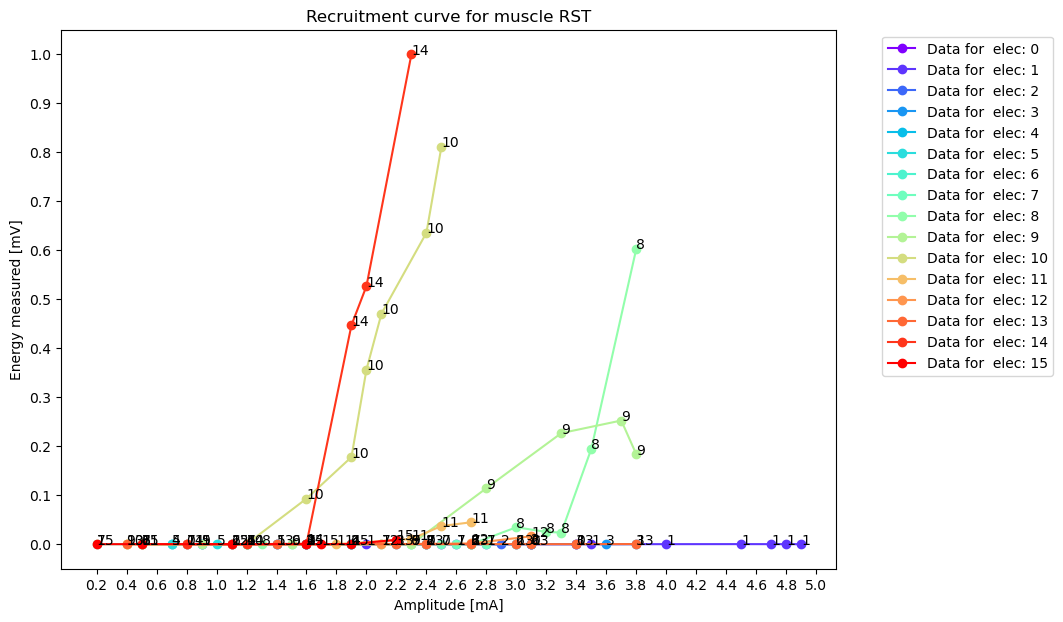

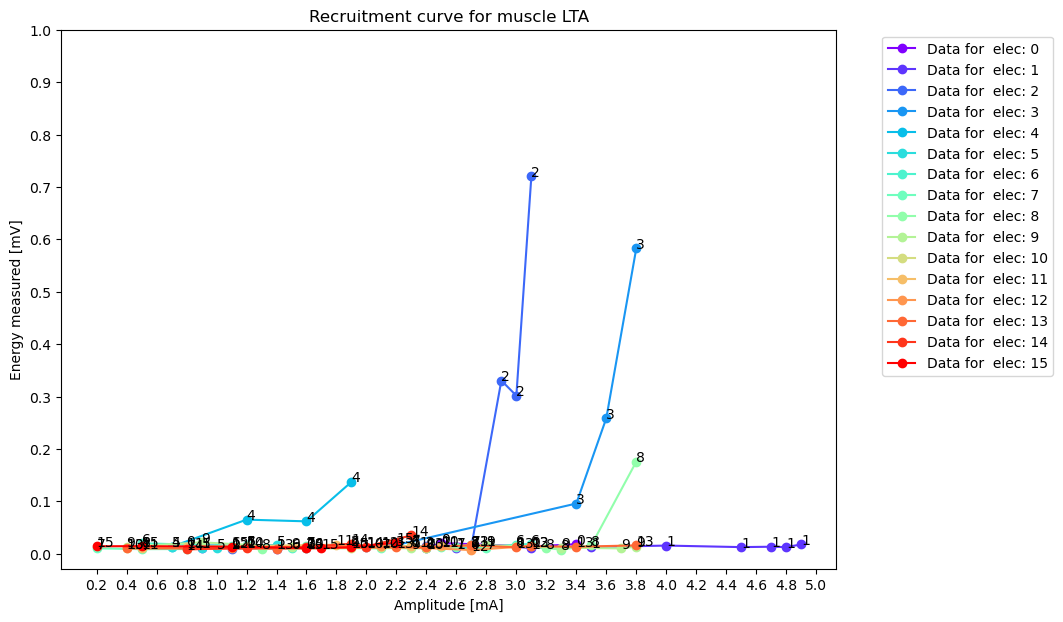

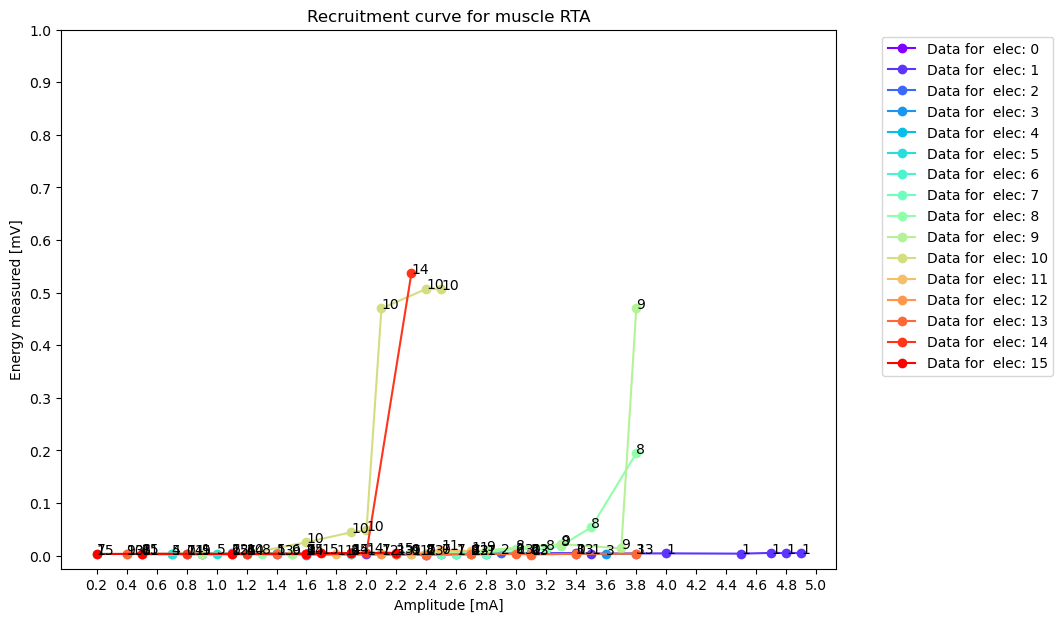

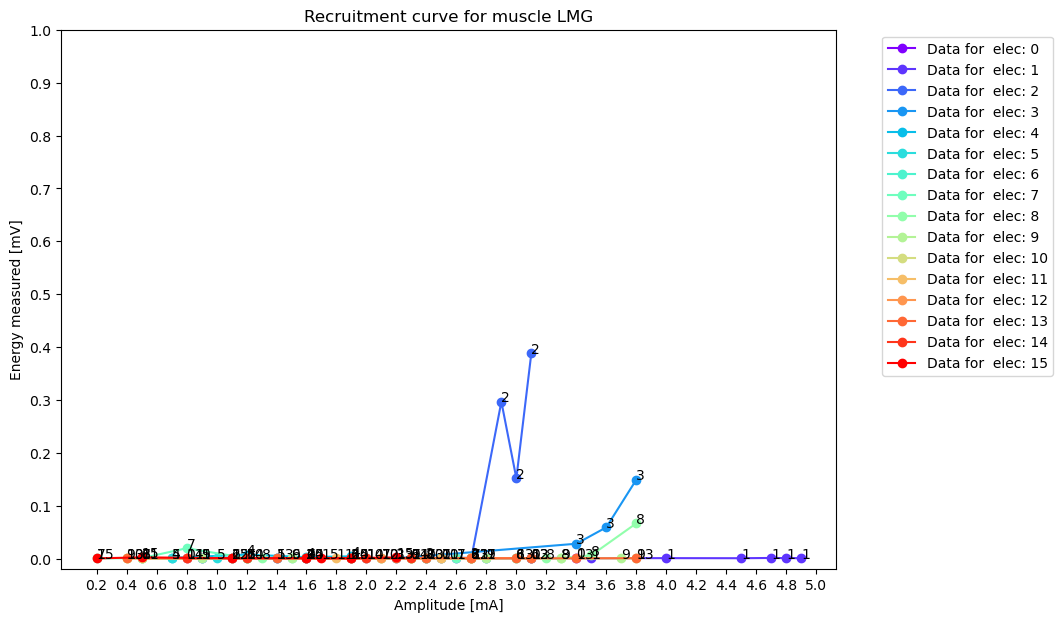

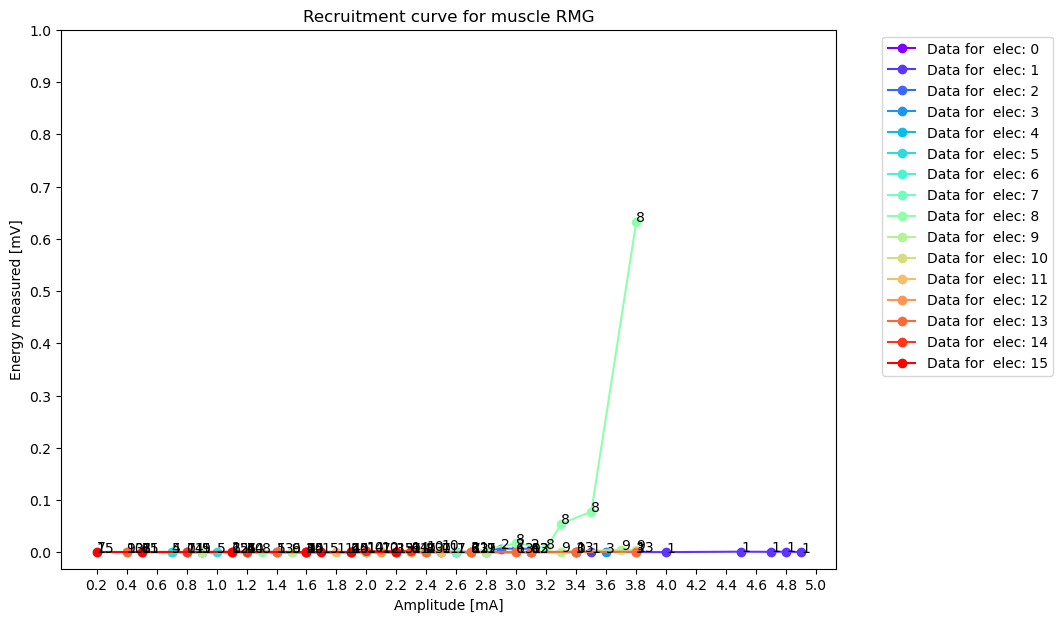

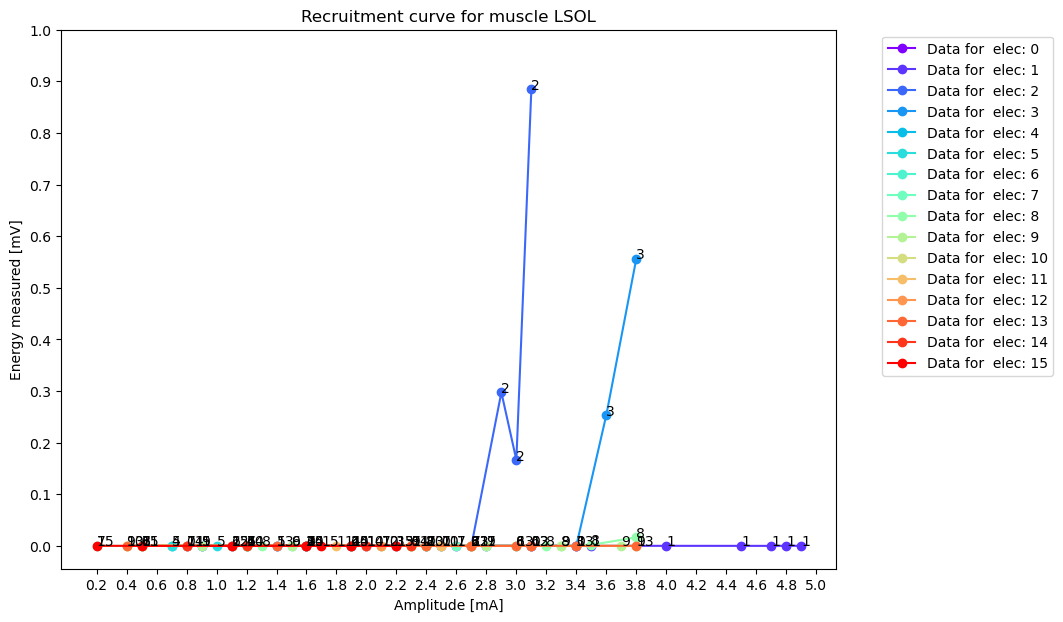

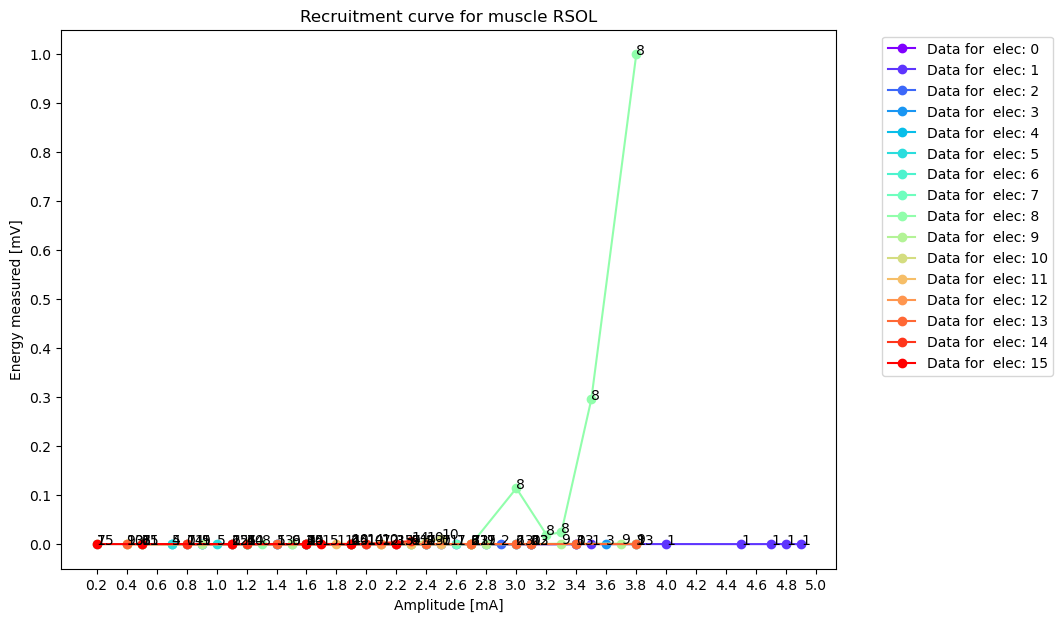

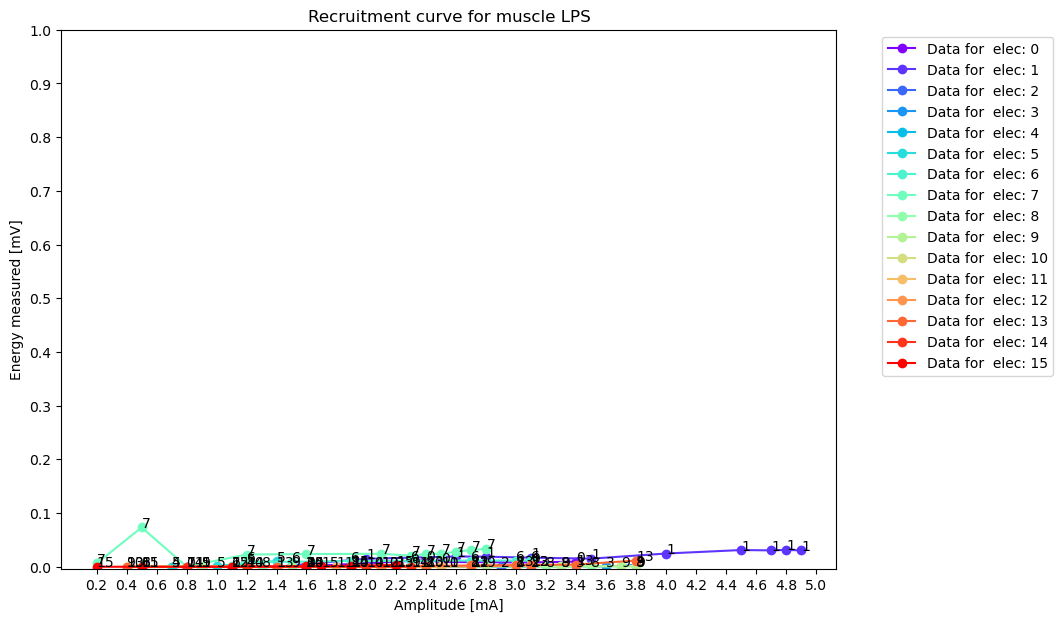

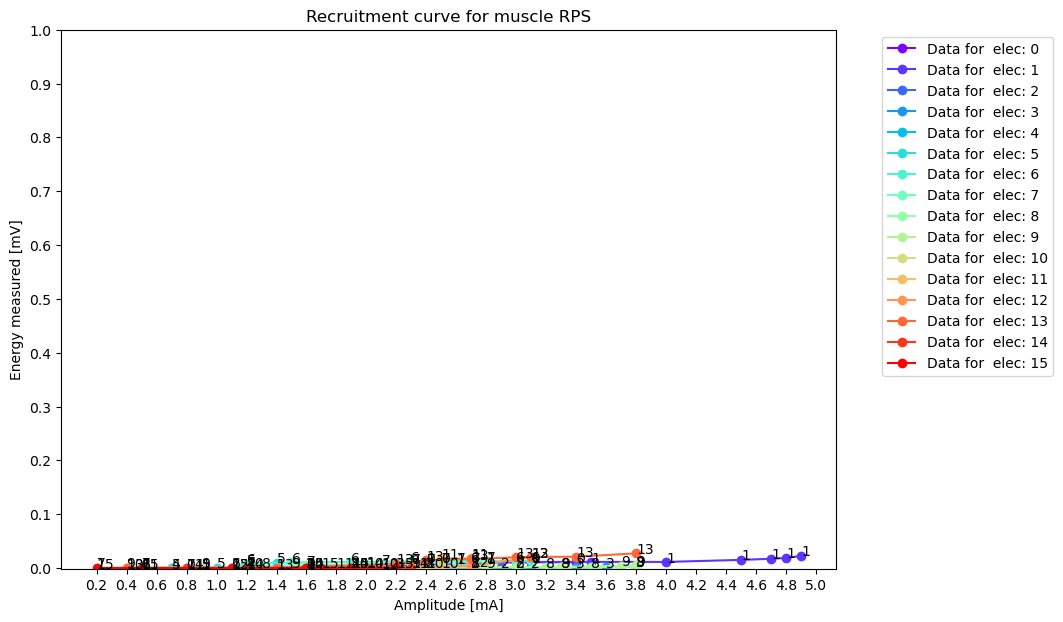

In [113]:
# Make a table for every muscle and different elecs
# safe images? set to 1
save_flag=0

colors = cm.rainbow(np.linspace(0, 1, len(mt_electrodes)))
label=mt_electrodes["elec_name"]

for muscle_i in range (len(mt_muscles)):
# for elec_i in range (0, len(mt_electrodes)):
  fig, ax = plt.subplots(figsize=(10,7))
  for elec_i in range (0, len(mt_electrodes)):
  # for muscle_i in range (len(mt_muscles)):

    # Define variables for plotting
    x = amplitude_filtereddata_to_tensor[elec_i,muscle_i,:]
    y = peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0]
  
    
    # Remove nan values for the text index
    x_without_nan=np.array(x)
    x_without_nan=x_without_nan[~np.isnan(x_without_nan)]
    y_without_nan=np.array(y)
    y_without_nan=y_without_nan[~np.isnan(y_without_nan)]

    # Plot the data points
    plt.plot(x_without_nan, y_without_nan, 'o-', c=colors[elec_i],  label= f"Data for  elec: {mt_electrodes['elec_name'][elec_i]}") 
    
    # Add text descripiton to the points for visibility
    for index in range (len(x_without_nan)):
        ax.text(x_without_nan[index], y_without_nan[index], label[elec_i], size=10) 
    
  
    # Set label and scale
    ax.set_xlabel("Amplitude [mA]")
    ax.set_xticks(ticks=np.linspace(start=0.2, stop=np.max(unique_amplitudes["amplitudes"])+0.1, endpoint=True, num=25))
    ax.set_ylabel("Energy measured [mV]")
    ax.set_yticks(ticks=np.linspace(0, np.nanmax(peak2peak_data_to_tensor [:, :,:, 0, 0]), 11))

 # Plotting settings
  ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  ax.set_title(f"Recruitment curve for muscle {mt_muscles['muscle_name'][muscle_i]}")

  ## save plots ##
  data_folder = "/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/Recruitment_curve"
  save_folder = os.path.join(data_folder,"recruitment_per_muscle")
  os.makedirs(save_folder,exist_ok=True)
  if save_flag:
      data_file = "muscle"+"_"+str(muscle_i)+"_"+"recruitment_curve"+'.png'
      data_file_path = os.path.join(save_folder,data_file)
      plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')
  plt.show()

## Recruitment with Integral values

On hold for now, evt. later to check results
We would use time series for now (not peak to peak values)

In [ ]:

# y are tiem_points of one time series , take abs value
y=abs(filtered_data_to_tensor[7, 0, 4 ,0, :])
x= np.arange(0, len(y))
scipy.integrate.simps(y, x, dx=1, axis=- 1, even='avg')


605.7151865034102

# Heat map

Brainstorming on selectivity target. Since not same Amplitudes used for every electrodes (with some elctrodes one stopped way earlier with stimulation) it's hard to compare the different data.


Normalisation of data

Since amplitudes used for the different electrodes vary, there must be a way to normalise, in order to compare the energy measured between the electrodes.
Thus an idea would be
    * normalise by amplitude:
        * for peak to peak values: max output(max activation) / input(amp) at max activation
        * for integral (hasn't been done yet): output int /input (amp) bim max 

However, I came up with the method, and havent found any sources yet!

### Heat map all muscles

In [ ]:
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data[muscle_i][elec_i]=max_value_normalised


In [26]:
def heatmap(data, row_labels=mt_muscles["muscle_name"], col_labels=mt_electrodes["elec_name"], ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels: muscles
        A list or array of length M with the labels for the rows.
    col_labels: electrodes
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


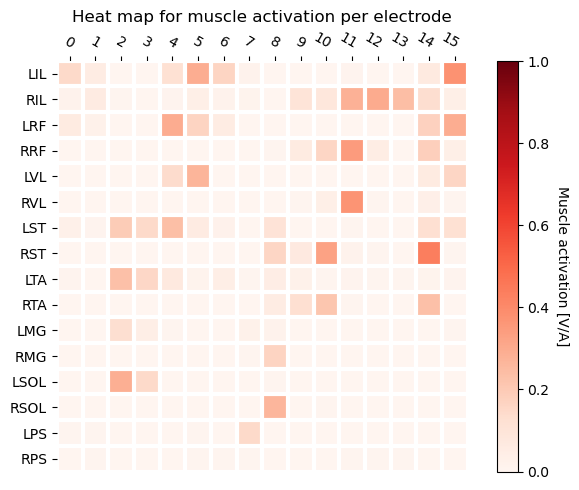

In [27]:

fig, ax = plt.subplots()

im, cbar = heatmap(data=data, cmap='Reds', cbarlabel="Muscle activation [V/A]", vmin=0, vmax=1)
# texts = annotate_heatmap(im)

fig.tight_layout()
ax.set_title('Heat map for muscle activation per electrode')
plt.show()

### Heat map indiviudal muscles, in paddle lead arrangement

#### Normalise by amplitude

In [121]:
### Calculate max value for heat map for each combination ### 
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data_1=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
      
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data_1[muscle_i][elec_i]=max_value_normalised



In [85]:
## multiply data by 10
### Calculate max value for heat map for each combination ### 
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data_by_10=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
      
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data_by_10[muscle_i][elec_i]=max_value_normalised*10

In [115]:
## multiply data by 100
### Calculate max value for heat map for each combination ### 
M=len(mt_muscles["muscle_name"])
N=len(mt_electrodes["elec_name"])

data_by_100=np.zeros((M,N))
for muscle_i in range(0, len(mt_muscles)):
    for elec_i in range (0, len(mt_electrodes)):
        ## Find max value for one combination
        max_value=np.nanmax(peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])
        ## Divide max value by amplitude at max value to normalise (not just between muscles but also between elecs)
        max_value_amplitude=amplitude_filtereddata_to_tensor[elec_i,muscle_i,np.where(max_value==peak2peak_data_to_tensor[elec_i, muscle_i, :, 0, 0])[0][0]]
      
        max_value_normalised=np.divide(max_value,max_value_amplitude)
        data_by_100[muscle_i][elec_i]=max_value_normalised*100



#### Heat map without interpolation

In [ ]:
#Original version


# get the map image as an array so we can plot it 
import matplotlib.image as mpimg 
map_img = mpimg.imread('/Users/nealarohner/Desktop/Projectome_Finder/code/Refrences/lead_original.png') 

paddle_lead =np.zeros(80* 9).reshape((80,9))
data=data_1  


text = np.array([
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','1', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '7','', '','', '', '', '13', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','0', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '6','', '','', '', '', '12', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','15', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '5','', '','', '', '', '11', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','14', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '4','', '','', '', '', '10', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '3','', '2','', '8', '', '9', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', '']])
  
for muscle_i in range(len(mt_muscles[0:2])):
    # creating subplot
    fig, ax = plt.subplots(figsize=(3,10)) 
   
    
    numbers=[1, 0, 15, 14]
    for index, number in enumerate(numbers, start=0):   # default is zero
        n=(14*index)+3 # equal spacing
        row=4
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]

    numbers=[7, 6, 5, 4]
    for index, number in enumerate(numbers, start=0):   # default is zero
        n=(14*index)+10 # equal spacing
        row=1
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]

    numbers=[13, 12, 11, 10]
    for index, number in enumerate(numbers, start=0):   # default is zero
        n=(14*index)+10 # equal spacing
        row=7
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]

    numbers=[3, 2, 8, 9]
    for index, number in enumerate(numbers, start=0):   # default is zero
        n=55+10
        row=1+(index*2)
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]        
 
    plt.title(f"Heat map for muscle {mt_muscles['muscle_name'][muscle_i]}")

        
    # drawing heatmap on current axes
    hmax= sns.heatmap(data=paddle_lead, annot=text, fmt="", cmap='Reds', cbar_kws={'label': "Muscle activation [V/A]"},
         yticklabels=False, xticklabels=False, vmin=0, vmax=1, 
         alpha = 0.75, # whole heatmap is translucent
        zorder = 2,
            )


    hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent =hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap




    # if save_flag:
    #     data_file = mt_muscles['muscle_name'][muscle_i]+"_"+"heat_map"+'.png'
    #     data_file_path = os.path.join(save_folder,data_file)
    #     plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')

    from matplotlib.pyplot import show 
    show()            
   

#### Heat map with interpolation 


Is it beter to use nearest neighbor or linear interpolation approach?
https://support.esri.com/en/technical-article/000005606
I'd think we'd have categrical data (instead of ccontinuous data)
thus nearest is recommended.

In [ ]:
### Interpolate unknown values in the heat map ###

def interpolate_missing_pixels(
        image: np.ndarray,
        mask: np.ndarray,
        method: str = 'nearest',
        # method: str = 'linear',
        # method: str = 'cubic',
        fill_value: int = 0
):
    """
    :param image: a 2D image
    :param mask: a 2D boolean image, True indicates missing values
    :param method: interpolation method, one of
        'nearest', 'linear', 'cubic'.
    :param fill_value: which value to use for filling up data outside the
        convex hull of known pixel values.
        Default is 0, Has no effect for 'nearest'.
    :return: the image with missing values interpolated
    """

    h, w = image.shape[:2]
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))

    known_x = xx[~mask]
    known_y = yy[~mask]
    known_v = image[~mask]
    missing_x = xx[mask]
    missing_y = yy[mask]

    interp_values = interpolate.griddata(
        (known_x, known_y), known_v, (missing_x, missing_y),
        method=method, fill_value=fill_value
    )

    interp_image = image.copy()
    interp_image[missing_y, missing_x] = interp_values

    return interp_image


In [ ]:
### text to define electrodes in plot
text = np.array([
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','1', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '7','', '','', '', '', '13', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','0', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '6','', '','', '', '', '12', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','15', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '5','', '','', '', '', '11', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','14', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '4','', '','', '', '', '10', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''], ['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '3','', '2','', '8', '', '9', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', ''],
['', '','', '','', '', '', '', ''],['', '','', '','', '', '', '', '']])

In [ ]:
## Plot heat map with interpolated data ##
# Save plot? set to 1
save_flag=1

## Get the lead image as an array so we can plot it ##
import matplotlib.image as mpimg 
map_img = mpimg.imread('/Users/nealarohner/Desktop/Projectome_Finder/code/Refrences/lead_original.png') 

## Build tensor filled with -1, thus undefined values are easily recognisable ##
paddle_lead =np.zeros(80* 9)
paddle_lead=np.array([-1]*len(paddle_lead))
paddle_lead=paddle_lead.reshape((80,9))

# Since it would round values between 0 and 1 to 0, we take data multiplicated by 100
data=data_by_100

## For every muscle fill tensor with values ##
for muscle_i in range(len(mt_muscles)):
    # creating subplot
    fig, ax = plt.subplots(figsize=(3,10)) 
   
    # Define electrode placements
    numbers=[1, 0, 15, 14]
    for index, number in enumerate(numbers, start=0): 
        n=(14*index)+3 # equal spacing
        row=4
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]

    numbers=[7, 6, 5, 4]
    for index, number in enumerate(numbers, start=0):  
        n=(14*index)+10 # equal spacing
        row=1
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]

    numbers=[13, 12, 11, 10]
    for index, number in enumerate(numbers, start=0):   
        n=(14*index)+10 # equal spacing
        row=7
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e]

    numbers=[3, 2, 8, 9]
    for index, number in enumerate(numbers, start=0):  
        n=55+10
        row=1+(index*2)
        e=number
        #save values to the indeces
        for i in range(6):
                paddle_lead[i+n][row] =data[muscle_i][e] 
    
    ## Create boolean, with true for the unknown values ##
    mask=paddle_lead<0
    ## Get interpolation for the unknown values ##
    interpolated_image=interpolate_missing_pixels(
    image=paddle_lead,
    mask=mask,
    method='nearest',
    fill_value= 0
    )

    plt.title(f"Heat map for muscle {mt_muscles['muscle_name'][muscle_i]}")

        
    ## Drawing heatmap on current axes ##
    hmax= sns.heatmap(data=interpolated_image, annot=text, fmt="", cmap='Reds', cbar_kws={'label': "Muscle activation [V/A]"},
         yticklabels=False, xticklabels=False, vmin=0, vmax=100, 
         alpha = 0.75, # whole heatmap is translucent
        zorder = 2,
            )


    hmax.imshow(map_img,
          aspect = hmax.get_aspect(),
          extent =hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1) #put the map under the heatmap



    ## Save plots 
    data_folder = "/Users/nealarohner/Desktop/Projectome_Finder/code/Neala_Master_Thesis/data/Recruitment_curve/heat_maps_interpolated"
    save_folder = os.path.join(data_folder,"nearest_point_interpolation")
    os.makedirs(save_folder,exist_ok=True)
    if save_flag:
        data_file = mt_muscles['muscle_name'][muscle_i]+"_"+"heat_map_near_interpolation"+'.png'
        data_file_path = os.path.join(save_folder,data_file)
        plt.savefig(data_file_path, transparent = "False",  bbox_inches='tight')


    show() 

#### Tryouts different interpolation strategies

##### all values in a df

In [21]:
## All values to dataframe

from scipy.interpolate import griddata 

print("#######################")

muscle_i=0
## Define elecs

    ##elec 0
n=14+3
row=4
e=0
a = pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_a= pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]), index=["data"])


    ## elec 1
n=0+3
row=4
e=1
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)  

## elec 2
n=55+10
row=3
e=2
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)  


## elec 3
n=55+10
row=1
e=3
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)  

## elec 4
n=41+10
row=1
e=4
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)     
    
## elec 5 ##
n=28+10
row=1
e=5
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)     
        

## elec 6 ##
n=14+10
row=1
e=6
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)   


    
## elec 7 
n=0+10
row=1
e=7
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)  

## elec 8
n=55+10
row=5
e=8
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)

## elec 9
n=55+10
row=7
e=9
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)

## elec 10
n=41+10
row=7
e=10
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)

## elec 11
n=28+10
row=7
e=11
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)

## elec 12
n=14+10
row=7
e=12
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)

## elec 13
n=0+10
row=7
e=13
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)   



##elec 14
n=42+3
row=4
e=14
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
a=pd.concat([a, b], axis=1)
data_a=pd.concat([data_a, data_b], axis=1)  

##elec 15
n=28+3
row=4
e=15
b=pd.DataFrame(np.array([[row, row, row, row, row, row, row],[n,n+1, n+2,n+3, n+4, n+5, n+6]]),index=["x_value", "y_value"])
data_b=pd.DataFrame(np.array([[data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e], data[muscle_i][e]]]),index=["data"])
## concat
df_2=pd.concat([a, b], axis=1)
df_3=pd.concat([data_a, data_b], axis=1) 

#######################


##### some interpolation working

problem that interpol to the sides doesnt seem to work

###############################
2
1
muscle:LIL


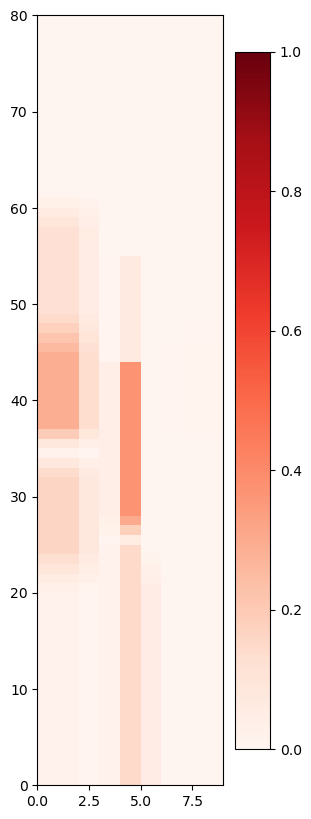

In [231]:
#### heat map with interpolataion without image

print("###############################")
points=np.array(df_2)
print(len(points))
values=np.array(df_3)
print(len(values))



## set function to interpolate
f=scipy.interpolate.interp2d(x=points[0], y=points[1], z=values, kind='linear', copy=True, bounds_error=False, fill_value=None)
## Define by whiyh axes it should interpolate
xnew = np.arange(0, 9)
ynew = np.arange(0, 80)
# xv, yv=np.meshgrid(xnew, ynew)
print(f"muscle:{mt_muscles['muscle_name'][muscle_i]}")

##plot figure
plt.figure(figsize=(3,10))
plt.pcolormesh(f(xnew, ynew), vmin=0, vmax=1, cmap='Reds')

plt.colorbar()
plt.show()


##### interpol with image

###############################
2
1
muscle:LIL


/Users/nealarohner/opt/anaconda3/envs/projectome_finder/lib/python3.10/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,19 m=112 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


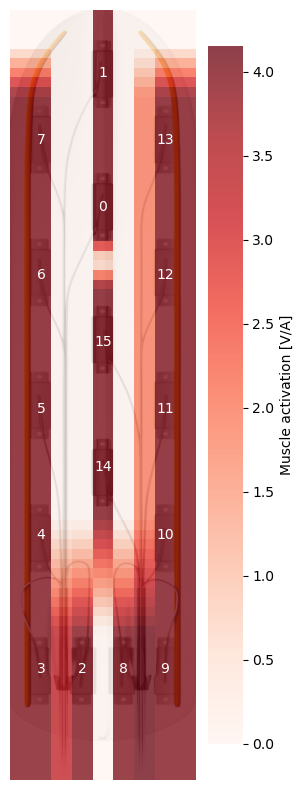

In [22]:

print("###############################")
points=np.array(df_2)
print(len(points))
values=np.array(df_3)
print(len(values))


one_color=[4]*len(values[0])
## set function to interpolate
f=scipy.interpolate.interp2d(x=points[0], y=points[1], 
# z=values[0], 
z=one_color,  
kind='linear', copy=True, bounds_error=False, fill_value=None)
## Define by whiyh axes it should interpolate
xnew = np.arange(0, 9)
ynew = np.arange(0, 80)
# xv, yv=np.meshgrid(xnew, ynew)
print(f"muscle:{mt_muscles['muscle_name'][muscle_i]}")

##plot figure
plt.figure(figsize=(3,10))

hmax= sns.heatmap(
data=f(xnew, ynew), 
# data=
cmap='Reds',
annot=text,
fmt="",
cbar_kws={'label': "Muscle activation [V/A]"} , 
yticklabels=False, xticklabels=False,
# vmin=0, vmax=1, 
alpha = 0.75, # whole heatmap is translucent
zorder = 2)


hmax.imshow(map_img,
        aspect = hmax.get_aspect(),
        extent =hmax.get_xlim() + hmax.get_ylim(),
        zorder = 1) #put the map under the heatmap


plt.show()

##### version spanish video

https://www.youtube.com/watch?v=CLg1vwv-nJI

problematic since they assume nxn array 

112
112


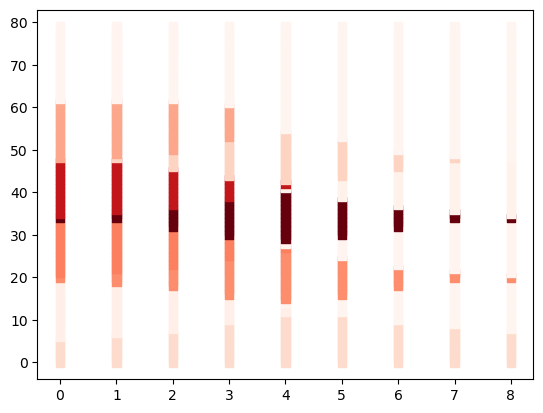

In [219]:
#### heat map with interpolataion nearest point

points=np.array(df_2.transpose())
print(len(points))
values=np.array(df_3.transpose())
print(len(values))



## set function to interpolate
xv, yv=np.meshgrid(np.arange(0, 9), np.arange(0, 80))
x_v=xv.ravel()
y_v=yv.ravel()
myInterpolator=scipy.interpolate.NearestNDInterpolator(points, values)
est_u=myInterpolator(x_v,y_v)



plt.scatter(x_v, y_v, marker="s", c=est_u, cmap="Reds")
# # f=scipy.interpolate.interp2d(xv, yv, z=values, kind='linear', copy=True, bounds_error=False, fill_value=None)
# ## Define by whiyh axes it should interpolate

# xv, yv=np.meshgrid(xnew, ynew)
# print(f"muscle:{mt_muscles['muscle_name'][muscle_i]}")

# ##plot figure
# plt.figure(figsize=(3,10))
# plt.pcolormesh(xv, yv, f, 
# #vmin=0, vmax=1, cmap='Reds'
#     )

# plt.colorbar()
# plt.show()

##### Version otehr youtube video

watch out since here no interpolation 
https://www.youtube.com/watch?v=Gj-prU8aEgg

2
1


/Users/nealarohner/opt/anaconda3/envs/projectome_finder/lib/python3.10/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=9,19 m=112 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


ValueError: not enough values to unpack (expected 2, got 0)

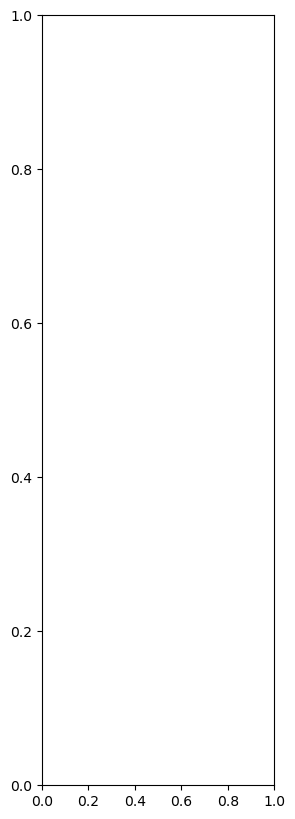

In [226]:
points=np.array(df_2)
print(len(points))
values=np.array(df_3)
print(len(values))



## set function to interpolate
x=
xv, yv=np.meshgrid(np.arange(0, 9), np.arange(0, 80))
# x_v=xv.ravel()
# y_v=yv.ravel()
# f=scipy.interpolate.interp2d(xv, yv, z=values, kind='linear', copy=True, bounds_error=False, fill_value=None)

f=scipy.interpolate.interp2d(x=points[0], y=points[1], z=values, kind='linear', copy=True, bounds_error=False, fill_value=None)

plt.figure(figsize=(3,10))
plt.pcolormesh(xv, yv, f
#vmin=0, vmax=1, cmap='Reds'
)

plt.colorbar()
plt.show()

##### try interpol with imshow()

But here we use the zero values inbewteen, thus corrupted interpolatio

In [36]:
muscle_i

15

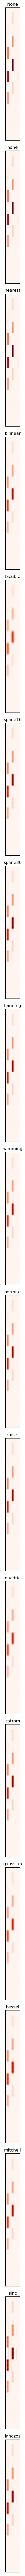

In [38]:
import matplotlib.pyplot as plt
import numpy as np

methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

# Fixing random state for reproducibility
# np.random.seed(19680801)

grid = paddle_lead

fig, axs = plt.subplots(nrows=18, ncols=1, figsize=(9, 100),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='Reds')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

##### use interpol griddata

try to use the paddle_lead data but turn zeros into nans, to then interpolate these parts

### GUI for heat maps and presentation

# Fitting Sigmoid curve to data

A possible plan could then be to take a look at the parameters of sigmoid after the fit (and the goodness of the fit) and use go from those to describe the data.
Then comparing these to the ones obtained with the simulations.

Version, assuming max value is max data value

opt:[0.49645561 3.49352357 2.57205074 0.01336421]
pcov:[[ 7.39141632e-04  1.04417296e-03 -7.19778168e-03 -1.65345728e-04]
 [ 1.04417296e-03  7.61741131e-03 -1.00878387e-02  2.65195941e-04]
 [-7.19778168e-03 -1.00878387e-02  1.55450996e-01  1.64932353e-03]
 [-1.65345728e-04  2.65195941e-04  1.64932353e-03  1.34459141e-04]]


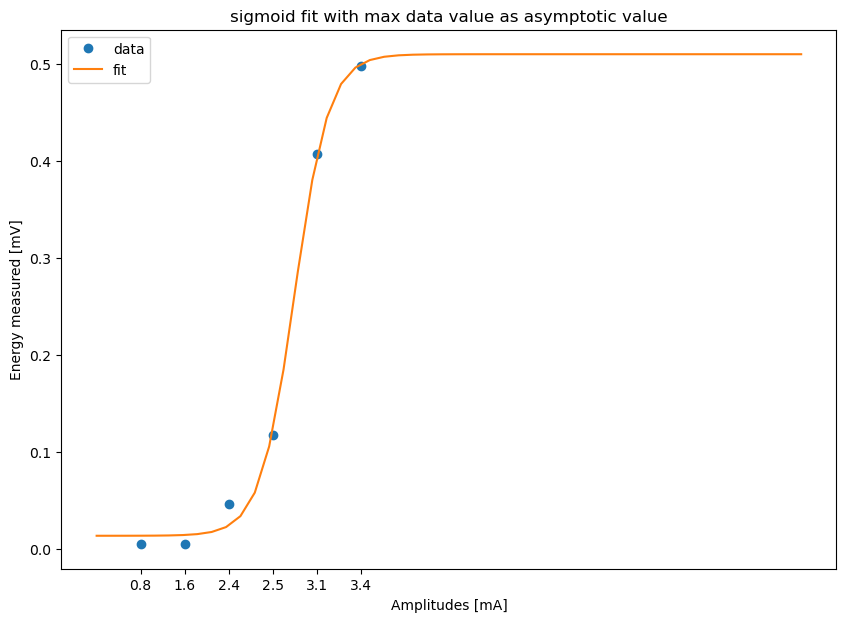

In [ ]:
## SErgio version

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

# L is responsible for scaling the output range from [0,1] to [0,L]
# b adds bias to the output and changes its range from [0,L] to [b,L+b]
# k is responsible for scaling the input, which remains in (-inf,inf)
# x0 is the point in the middle of the Sigmoid, i.e. the point where Sigmoid should originally output the value 1/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

muscle_i=0
elec_i=0
## assuming
peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0])
peak_peak_values=peak_peak_values.dropna()
peak_peak_values=np.array(peak_peak_values[0])
xdata=np.arange(0, len(peak_peak_values))
ydata=peak_peak_values


# for the plot amplitudes
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])


## Initial guess for the parameters ##

# maximum=1 # The maximum asymptotic intensity.
# midpoint=np.max(xdata) # The time point at which the sigmoidal curve reaches half of its maximum intensity.
# slope =0.5 # The slope of the curve at the midpoint.
# # p0 = [maximum, midpoint,slope] # this is an mandatory initial guess
p0 =[max(ydata), np.median(xdata),1,min(ydata)]
# p0 =[1, np.median(xdata),1,min(ydata)]

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')
print(f"opt:{popt}")
print(f"pcov:{pcov}")
x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Energy measured [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title("sigmoid fit with max data value as asymptotic value")
pylab.plot(xdata, ydata, 'o', label='data')

# set ticks

ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(x,y, label='fit')
plt.legend()



Version assuming max value is at higher amplitude

In [ ]:
# Neala version 




import numpy as np
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

peak_peak_values=pd.DataFrame(peak2peak_data_to_tensor[muscle_i,elec_i,:,0,0])
peak_peak_values=peak_peak_values.dropna()
peak_peak_values=np.array(peak_peak_values[0])
xdata=np.arange(0, len(peak_peak_values))
ydata=peak_peak_values

# for the plot amplitudes
amplitudes=pd.DataFrame(amplitude_filtereddata_to_tensor[muscle_i,elec_i,:])
amplitudes=amplitudes.dropna()
amplitudes=np.array(amplitudes[0])

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print (popt)

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

fig, ax = plt.subplots(figsize=(10,7))
plt.ylabel("Energy measured [mV]")
plt.xlabel("Amplitudes [mA]")
plt.title("sigmoid fit asymptotic value after max data value")
ticks=np.arange(0, len(amplitudes))
labels=amplitudes
ax.set_xticks(ticks, labels=labels)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

[4.81608384 0.92039473]
